In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\agricultural sustainability.csv')

In [13]:
df.head
df.describe

<bound method NDFrame.describe of      soil_health   crop_yield  water_usage  carbon_footprint  fertilizer_use  sustainability
0       0.374540  6778.284815   964.057410        126.020778      226.809659               0
1       0.950714  1757.259685  4561.488080        175.365653       88.134761               0
2       0.731994  2454.658427  2773.635676        129.654718      194.072090               0
3       0.598658  9086.987697  4219.058597         89.916140      201.678762               0
4       0.156019  6457.861537  1940.223205        104.286142      156.032668               0
..           ...          ...          ...               ...             ...             ...
195     0.349210  9376.815930  2632.827381        442.455759       72.895518               0
196     0.725956  8725.714767  3504.009823        469.453227      279.328394               0
197     0.897110  4860.946246  1275.439420        304.309933       84.204658               0
198     0.887086  7757.839610  1365.

In [4]:
df.shape

(200, 6)

In [8]:
df['sustainability'].unique()

array([0, 1])

In [6]:
df.columns

Index(['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use', 'sustainability'],
      dtype='object')

In [7]:
x=df[['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint','fertilizer_use']]
y=df['sustainability']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=11)

In [10]:
x_train.shape

(160, 5)

In [11]:
x_test.shape

(40, 5)

In [12]:
model = RandomForestClassifier(n_estimators=100,random_state=100)

In [14]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [16]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
len(y_pred)

40

In [18]:
acc = accuracy_score(y_test,y_pred)
print(f'The accuracy score for RFC is {acc*100:.2f}%')

The accuracy score for RFC is 100.00%


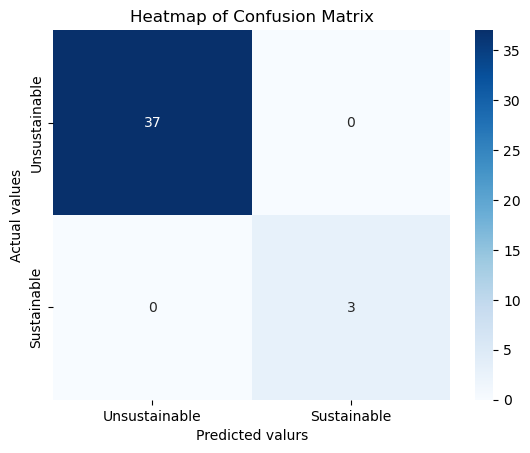

In [19]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=['Unsustainable','Sustainable'],yticklabels=['Unsustainable','Sustainable'])
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted valurs')
plt.ylabel('Actual values')
plt.show()

In [22]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [21]:
import joblib
joblib.dump(model,'RF_Model.pkl')

['RF_Model.pkl']